In [2]:
import os
import numpy as np
import re
import cv2
from scipy.io import wavfile
import matplotlib.pyplot as plt
from scipy import signal
import librosa.display

In [3]:
# read all files
fnames = os.listdir('vis-data')
suffixes = ['_times.txt', '_denoised_thumb.mp4', '_mic.mp4', '_mic.wav', '_denoised.mp4', '_denoised.wav']
ids = set()
for name in fnames:
    for suffix in suffixes:
        idx = name.find(suffix)
        if idx == -1:
            continue
        prefix = name[:idx]
        ids.add(prefix)
print(len(ids))
ids = list(ids)

977


In [4]:
def parse_classes(name, idx):
    elems = set()
    with open(f'vis-data/{name}', 'r') as f:
        lines = f.readlines()
    for line in lines:
        words = re.split(' |\n', line)
        if len(words) < idx+1:
            continue
        if words[idx] == 'None':
            continue
        elems.add(words[idx])
    return list(elems)

In [5]:
all_materials = set()
for name in fnames:
    if name.find('.txt') == -1:
        continue
    elems = parse_classes(name, 1)
    all_materials.update(elems)

all_materials = list(all_materials)
materials_log = {}
for i, cat in enumerate(all_materials):
    materials_log[cat] = i
print('materials:')
print(materials_log)



all_reactions = set()
for name in fnames:
    if name.find('.txt') == -1:
        continue
    elems = parse_classes(name, 3)
    all_reactions.update(elems)

all_reactions = list(all_reactions)
reactions_log = {}
for i, cat in enumerate(all_reactions):
    reactions_log[cat] = i
print('reactions:')
print(reactions_log)

materials:
{'carpet': 0, '': 1, 'drywall': 2, 'glass': 3, 'grass': 4, 'rock': 5, 'plastic-bag': 6, 'cloth': 7, 'paper': 8, 'dirt': 9, 'leaf': 10, 'wood': 11, 'plastic': 12, 'metal': 13, 'gravel': 14, 'ceramic': 15, 'tile': 16, 'water': 17}
reactions:
{'rigid-motion': 0, 'splash': 1, 'static': 2, 'deform': 3, 'scatter': 4}


In [6]:
def process_image(fname):
    # given a mp4, take and return the first image from it
    vidcap = cv2.VideoCapture(f'vis-data/{fname}_denoised_thumb.mp4')
    _, image = vidcap.read()
    cv2.imwrite(f'vis-data-simple/{fname}/{fname}_image.png', image)

def process_hits(fname):
    x , sr = librosa.load(f'vis-data/{fname}_denoised.wav')
    with open(f'vis-data/{fname}_times.txt', 'r') as f:
        lines = f.readlines()
    i = 0
    for line in lines:
        words = re.split(' |\n', line)
        if 'None' in words:
            continue
        t = float(words[0])
        material_id = materials_log[words[1]]
        hit_id = 1*(words[2] == 'scratch') #hit = 0, scratch = 1
        reaction_id = reactions_log[words[3]]
        with open(f'vis-data-simple/{fname}/{fname}_labels_{i}.txt', 'w') as f:
            f.write(str(material_id)+'\n')
            f.write(str(hit_id)+'\n')
            f.write(str(reaction_id))
        
        dt = 0.5
        subset = x[int(sr*(t - dt)):int(sr*(t+dt))]
        X = librosa.stft(subset)
        Xdb = librosa.amplitude_to_db(abs(X))
        fig = plt.figure(figsize=(5, 5))
        librosa.display.specshow(Xdb, sr=sr, cmap='gray')
        fig.savefig(f'vis-data-simple/{fname}/{fname}_spec_{i}.png')
        plt.close()
        i += 1
    with open(f'vis-data-simple/{fname}/{fname}_metadata.txt', 'w') as f:
        f.write(str(i))

In [76]:
for data_id in ids:
    process_video(id)
    process_txt(id)

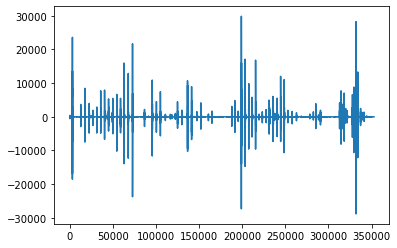

In [8]:
avg_samples = []
interval = 20
for i in range(len(samples)//interval):
    avg_samples.append(sum(samples[i*interval:(i+1)*interval])/interval)
plt.plot(avg_samples)

In [56]:
x , sr = librosa.load('vis-data/2015-02-16-16-49-06_denoised.wav')

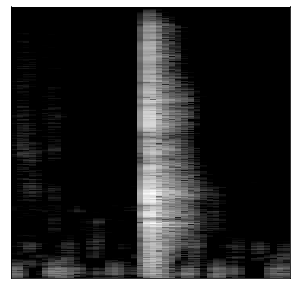

In [64]:

offset = 2
#subset = x[int(sr*(offset)):int(sr*(offset+10))]
dt = 0.5
subset = x[int(sr*(t - dt)):int(sr*(t+dt))]


X = librosa.stft(subset)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(5, 5))
librosa.display.specshow(Xdb, sr=sr, cmap='gray')
#plt.colorbar()

In [49]:
line_lens = []
for fname in ids:
    with open(f'vis-data/{fname}_times.txt', 'r') as f:
        lines = f.readlines()
        line_lens.append(len(lines))

In [51]:
sum(line_lens)/len(line_lens)

47.67349027635619

In [60]:
len(subset)

22050

In [7]:
for i, trial in enumerate(ids):
    if i%40 == 39:
        print(f'processed {i} images')
    try:
        os.mkdir(f'vis-data-simple/{trial}')
        process_image(trial)
        process_hits(trial)
    except:
        pass

processed 39 images
processed 79 images
processed 119 images
processed 159 images
processed 199 images
processed 239 images
processed 279 images
processed 319 images
processed 359 images
processed 399 images
processed 439 images
processed 479 images
processed 519 images
processed 559 images
processed 599 images
processed 639 images
processed 679 images
processed 719 images
processed 759 images
processed 799 images
processed 839 images
processed 879 images
processed 919 images
processed 959 images


In [ ]:
vid = cv2.VideoCapture(f'vis-data/{fname}_denoised_thumb.mp4')